# Part A

## Importing all the libraries needed

In [1]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

## Defining accuracy1 and accuracy2

In [2]:
def accuracy1(y_true, y_pred):
    
    if len(y_pred)!=len(y_true):
        raise Exception("The two array must be of the same dimentions!")
    
    count = 0
    for i in range(len(y_pred)):
        if y_pred[i] <= y_true[i]*1.04 and y_pred[i] >= y_true[i]*0.96:
            count += 1
    
    return count/len(y_pred)
            
    
def accuracy2(y_true, y_pred):
    
    if len(y_pred)!=len(y_true):
        raise Exception("The two array must be of the same dimentions!")
    
    count = 0
    for i in range(len(y_pred)):
        if (y_pred[i] <= y_true[i]*1.04 and y_pred[i] >= y_true[i]*0.96) or y_true[i]%y_pred[i]== 0 or y_pred[i]%y_true[i]== 0:
            count += 1
    
    return count/len(y_pred)

## Loading all the train data

In [3]:
train_df = pd.read_csv("train4final_hw.csv")

## Selecting at random $m = 10$ observations from the **training set** for Part B.

In [4]:
np.random.seed(1234)

chosen_idx = np.random.choice(len(train_df), size = 10)

partB_df = train_df.iloc[chosen_idx]

partB_df

,mel1_t1,mel1_t2,mel1_t3,mel1_t4,mel1_t5,mel1_t6,mel1_t7,mel1_t8,mel1_t9,mel1_t10,...,prec.x,roughness,rugo,sfm.1,shannon,simpson,renyi,id,genre,tempo
815,275.050734,272.834307,270.534823,271.321844,265.721748,295.053231,287.132779,278.012982,289.525987,289.342372,...,0.125,3.230718,0.175416,0.162642,0.807020,0.985819,0.682208,1159,19,128.0
723,282.874249,290.765179,300.027555,314.282681,311.497477,301.027809,303.469009,310.704548,302.823372,309.866566,...,0.125,2.082593,0.174907,0.451157,0.810744,0.972550,0.576342,861,5,175.0
1318,295.866554,309.168998,291.108803,272.658062,286.092493,269.386483,259.063367,282.176303,262.418541,284.015301,...,0.125,1.799326,0.175178,0.661843,0.919176,0.993205,0.800147,934,13,113.0
1077,268.325600,267.555656,267.905503,266.911166,265.841159,265.818617,266.741212,264.630055,262.436045,264.904423,...,0.125,4.807463,0.179146,0.636884,0.929261,0.995097,0.852449,295,20,137.6
1228,288.692233,286.210030,297.394528,297.734714,288.769802,290.543197,285.969640,275.519207,296.404847,284.672493,...,0.125,1.675343,0.171151,0.415936,0.856522,0.990450,0.745589,370,4,110.0
1396,273.194057,275.139660,275.090196,300.450399,290.305453,292.333299,285.147244,270.590157,276.359994,269.850574,...,0.125,0.727507,0.173976,0.308931,0.697922,0.950689,0.482439,1697,19,134.0
664,208.904452,216.345940,232.873659,272.492843,295.597689,272.689490,250.193753,245.604549,239.719910,237.740564,...,0.125,1.422723,0.175173,0.042738,0.445245,0.883417,0.344508,1312,6,180.0
689,297.403723,305.525745,310.613782,296.089683,295.830901,307.153993,306.130742,304.652032,304.721619,317.116978,...,0.125,2.629111,0.176166,0.684984,0.927216,0.994066,0.821863,911,5,174.0
279,281.004180,280.108439,280.115544,283.198226,274.012355,292.646752,284.181033,275.181385,274.776309,268.744237,...,0.125,1.593020,0.174331,0.414467,0.764095,0.965578,0.540060,108,19,134.0
1257,240.190807,253.744007,280.017902,267.405297,298.956521,270.333096,255.017715,277.225146,257.026261,293.010801,...,0.125,1.382261,0.174572,0.471098,0.747266,0.940076,0.451193,181,19,126.0


## We drop the $m$ choosen rows in the **training set**.

In [5]:
train_df = train_df.drop(chosen_idx)

## Defining the features and the target data

We have dropped the Mel-frequency cepstrall coefficients and dominant frequency to work only with the statistics.

In [6]:
x = train_df.iloc[:, 7011:7041].values

y = train_df.loc[:, ['tempo']].values

## Scaling the data

In [7]:
scaler = StandardScaler().fit(x)

x = scaler.transform(x)

## Doing dimentionality reduction using PCA

In [8]:
pca = PCA(.95)
pca.fit(x)
x = pca.transform(x)

In [9]:
print("Number of principal components used for .95 variance:", pca.n_components_)

Number of principal components used for .95 variance: 14


# Performing SVM Regression with GridSearchCV

In [10]:
parameters = {'kernel':('poly', 'rbf', 'sigmoid'),
              'gamma':('scale', 'auto'), 'epsilon':[0.1, 0.2]}

gs = GridSearchCV(estimator = SVR(),
                  param_grid = parameters,
                  scoring = make_scorer(accuracy2),
                  verbose = 3)

gs.fit(x, y.ravel())
print(gs.best_params_)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5] END epsilon=0.1, gamma=scale, kernel=poly;, score=0.309 total time=   0.6s
[CV 2/5] END epsilon=0.1, gamma=scale, kernel=poly;, score=0.287 total time=   0.6s
[CV 3/5] END epsilon=0.1, gamma=scale, kernel=poly;, score=0.316 total time=   0.6s
[CV 4/5] END epsilon=0.1, gamma=scale, kernel=poly;, score=0.319 total time=   0.4s
[CV 5/5] END epsilon=0.1, gamma=scale, kernel=poly;, score=0.316 total time=   0.3s
[CV 1/5] END epsilon=0.1, gamma=scale, kernel=rbf;, score=0.299 total time=   0.4s
[CV 2/5] END epsilon=0.1, gamma=scale, kernel=rbf;, score=0.252 total time=   0.4s
[CV 3/5] END epsilon=0.1, gamma=scale, kernel=rbf;, score=0.310 total time=   0.3s
[CV 4/5] END epsilon=0.1, gamma=scale, kernel=rbf;, score=0.300 total time=   0.5s
[CV 5/5] END epsilon=0.1, gamma=scale, kernel=rbf;, score=0.300 total time=   0.5s
[CV 1/5] END epsilon=0.1, gamma=scale, kernel=sigmoid;, score=0.260 total time=   0.4s
[CV 2/5] END epsi

## Predicting on the **test set**

In [11]:
test_df = pd.read_csv("test4final_hw.csv")

results = test_df.loc[:, ['id']]

x_test = test_df.iloc[:, 7011:7041].values
x_test = scaler.transform(x_test)
x_test = pca.transform(x_test)

results = results.assign(target = gs.best_estimator_.predict(x_test).reshape(-1,1).ravel())

## Saving the results as a .csv file

In [12]:
results.to_csv('results.csv', index = False)

## Bonus section

### Importing needed libraries

In [13]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import Model
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.losses import MeanSquaredLogarithmicError

2022-06-04 18:06:12.048028: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-06-04 18:06:12.048078: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


### Defining the model

In [14]:
model = Sequential([
    Dense(pca.n_components_, kernel_initializer = 'normal', activation = 'relu'),
    Dropout(0.2),
    Dense(100, kernel_initializer = 'normal', activation = 'relu'),
    Dense(1, kernel_initializer='normal', activation='linear')
])

2022-06-04 18:06:15.488379: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-06-04 18:06:15.488461: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-06-04 18:06:15.488512: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (arch-pc): /proc/driver/nvidia/version does not exist
2022-06-04 18:06:15.489075: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


### Training the model

In [15]:
tf.random.set_seed(42)

msle = MeanSquaredLogarithmicError()
learning_rate = 0.01

model.compile(
    loss = msle, 
    optimizer = Adam(learning_rate = learning_rate), 
    metrics = [msle]
)

history = model.fit(
    x, 
    y.ravel(), 
    epochs=100, 
    batch_size=64,
    validation_split=0.33
)

Epoch 1/100
17/17 [==============================] - 2s 53ms/step - loss: 15.3774 - mean_squared_logarithmic_error: 14.9745 - val_loss: 5.7099 - val_mean_squared_logarithmic_error: 5.7099
Epoch 2/100
17/17 [==============================] - 0s 16ms/step - loss: 2.7129 - mean_squared_logarithmic_error: 2.6198 - val_loss: 0.9795 - val_mean_squared_logarithmic_error: 0.9795
Epoch 3/100
17/17 [==============================] - 0s 17ms/step - loss: 0.5546 - mean_squared_logarithmic_error: 0.5433 - val_loss: 0.2693 - val_mean_squared_logarithmic_error: 0.2693
Epoch 4/100
17/17 [==============================] - 0s 15ms/step - loss: 0.2129 - mean_squared_logarithmic_error: 0.2105 - val_loss: 0.1434 - val_mean_squared_logarithmic_error: 0.1434
Epoch 5/100
17/17 [==============================] - 0s 17ms/step - loss: 0.1590 - mean_squared_logarithmic_error: 0.1554 - val_loss: 0.1173 - val_mean_squared_logarithmic_error: 0.1173
Epoch 6/100
17/17 [==============================] - 0s 15ms/step - 

Epoch 45/100
17/17 [==============================] - 0s 19ms/step - loss: 0.0806 - mean_squared_logarithmic_error: 0.0807 - val_loss: 0.0623 - val_mean_squared_logarithmic_error: 0.0623
Epoch 46/100
17/17 [==============================] - 0s 18ms/step - loss: 0.0788 - mean_squared_logarithmic_error: 0.0767 - val_loss: 0.0619 - val_mean_squared_logarithmic_error: 0.0619
Epoch 47/100
17/17 [==============================] - 0s 19ms/step - loss: 0.0783 - mean_squared_logarithmic_error: 0.0764 - val_loss: 0.0617 - val_mean_squared_logarithmic_error: 0.0617
Epoch 48/100
17/17 [==============================] - 0s 16ms/step - loss: 0.0732 - mean_squared_logarithmic_error: 0.0725 - val_loss: 0.0617 - val_mean_squared_logarithmic_error: 0.0617
Epoch 49/100
17/17 [==============================] - 0s 15ms/step - loss: 0.0746 - mean_squared_logarithmic_error: 0.0726 - val_loss: 0.0608 - val_mean_squared_logarithmic_error: 0.0608
Epoch 50/100
17/17 [==============================] - 0s 18ms/ste

Epoch 89/100
17/17 [==============================] - 0s 19ms/step - loss: 0.0590 - mean_squared_logarithmic_error: 0.0578 - val_loss: 0.0535 - val_mean_squared_logarithmic_error: 0.0535
Epoch 90/100
17/17 [==============================] - 0s 21ms/step - loss: 0.0564 - mean_squared_logarithmic_error: 0.0570 - val_loss: 0.0535 - val_mean_squared_logarithmic_error: 0.0535
Epoch 91/100
17/17 [==============================] - 0s 16ms/step - loss: 0.0566 - mean_squared_logarithmic_error: 0.0555 - val_loss: 0.0536 - val_mean_squared_logarithmic_error: 0.0536
Epoch 92/100
17/17 [==============================] - 0s 18ms/step - loss: 0.0541 - mean_squared_logarithmic_error: 0.0554 - val_loss: 0.0534 - val_mean_squared_logarithmic_error: 0.0534
Epoch 93/100
17/17 [==============================] - 0s 16ms/step - loss: 0.0524 - mean_squared_logarithmic_error: 0.0541 - val_loss: 0.0534 - val_mean_squared_logarithmic_error: 0.0534
Epoch 94/100
17/17 [==============================] - 0s 18ms/ste

### Plotting the history

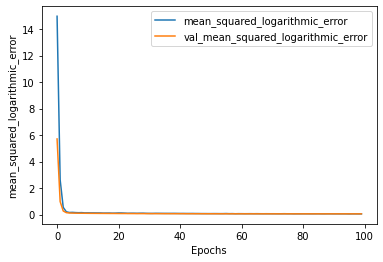

In [16]:
def plot_history(history, key):
  plt.plot(history.history[key])
  plt.plot(history.history['val_'+key])
  plt.xlabel("Epochs")
  plt.ylabel(key)
  plt.legend([key, 'val_'+key])
  plt.show()

plot_history(history, 'mean_squared_logarithmic_error')

### Predicting on the test set

In [17]:
results_bonus = test_df.loc[:, ['id']]

results_bonus = results_bonus.assign(target = model.predict(x_test))

21/21 [==============================] - 0s 3ms/step


###  Saving the results of the bonus section

In [18]:
results.to_csv('results_bonus.csv', index = False)

# Part B

## Importing some libraries

In [19]:
from math import ceil

## Preparing the data for part B

In [20]:
x_B = partB_df.iloc[:, 7011:7041].values

y_B = partB_df.loc[:, ['tempo']].values

### Scaling the data

In [21]:
scalerB = StandardScaler().fit(x_B)
x_B = scalerB.transform(x_B)

### Performing dimensionality reduction using PCA

In [22]:
x_B = pca.transform(x_B)

## Implement the *Split Conformal Prediction for Regression* algorithm

### Prepraring the $D^{(1)}$ and $D^{(2)}$ dataset

#### Redefining x and y for doing proper data preprocessing

In [23]:
x = train_df.iloc[:, 7011:7041].values
y = train_df.loc[:, ['tempo']].values

#### Splitting into training and calibration set

In [24]:
x_d1, x_d2, y_d1, y_d2 = train_test_split(x, y, test_size=0.5, random_state=42)

#### Scaling the data

In [25]:
scalerd1 = StandardScaler().fit(x_d1)
scalerd2 = StandardScaler().fit(x_d2)

x_d1 = scalerd1.transform(x_d1)
x_d2 = scalerd2.transform(x_d2)

#### Performing dimensionality reduction

In [26]:
x_d1 = pca.transform(x_d1)
x_d2 = pca.transform(x_d2)

### Training on $D^{(1)}$ the ANN

In [27]:
modelB = Sequential([
    Dense(pca.n_components_, kernel_initializer = 'normal', activation = 'relu'),
    Dropout(0.2),
    Dense(100, kernel_initializer = 'normal', activation = 'relu'),
    Dense(1, kernel_initializer='normal', activation='linear')
])

tf.random.set_seed(42)

msle = MeanSquaredLogarithmicError()
learning_rate = 0.01

modelB.compile(
    loss = msle, 
    optimizer = Adam(learning_rate = learning_rate), 
    metrics = [msle]
)

historyB = modelB.fit(
    x_d1, 
    y_d1.ravel(), 
    epochs=100, 
    batch_size=64,
    validation_split=0.33
)

Epoch 1/100
9/9 [==============================] - 2s 100ms/step - loss: 20.5479 - mean_squared_logarithmic_error: 20.1520 - val_loss: 13.4785 - val_mean_squared_logarithmic_error: 13.4785
Epoch 2/100
9/9 [==============================] - 0s 36ms/step - loss: 9.5990 - mean_squared_logarithmic_error: 9.1679 - val_loss: 5.2542 - val_mean_squared_logarithmic_error: 5.2542
Epoch 3/100
9/9 [==============================] - 0s 30ms/step - loss: 3.6852 - mean_squared_logarithmic_error: 3.4931 - val_loss: 2.0703 - val_mean_squared_logarithmic_error: 2.0703
Epoch 4/100
9/9 [==============================] - 0s 30ms/step - loss: 1.4201 - mean_squared_logarithmic_error: 1.3515 - val_loss: 0.9033 - val_mean_squared_logarithmic_error: 0.9033
Epoch 5/100
9/9 [==============================] - 0s 39ms/step - loss: 0.6646 - mean_squared_logarithmic_error: 0.6721 - val_loss: 0.4532 - val_mean_squared_logarithmic_error: 0.4532
Epoch 6/100
9/9 [==============================] - 0s 42ms/step - loss: 0.3

9/9 [==============================] - 0s 25ms/step - loss: 0.0679 - mean_squared_logarithmic_error: 0.0678 - val_loss: 0.0649 - val_mean_squared_logarithmic_error: 0.0649
Epoch 90/100
9/9 [==============================] - 0s 25ms/step - loss: 0.0686 - mean_squared_logarithmic_error: 0.0639 - val_loss: 0.0652 - val_mean_squared_logarithmic_error: 0.0652
Epoch 91/100
9/9 [==============================] - 0s 25ms/step - loss: 0.0761 - mean_squared_logarithmic_error: 0.0751 - val_loss: 0.0650 - val_mean_squared_logarithmic_error: 0.0650
Epoch 92/100
9/9 [==============================] - 0s 28ms/step - loss: 0.0662 - mean_squared_logarithmic_error: 0.0615 - val_loss: 0.0643 - val_mean_squared_logarithmic_error: 0.0643
Epoch 93/100
9/9 [==============================] - 0s 24ms/step - loss: 0.0687 - mean_squared_logarithmic_error: 0.0757 - val_loss: 0.0637 - val_mean_squared_logarithmic_error: 0.0637
Epoch 94/100
9/9 [==============================] - 0s 29ms/step - loss: 0.0630 - mean_s

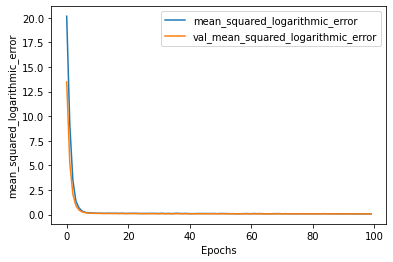

In [28]:
plot_history(historyB, 'mean_squared_logarithmic_error')

### Predict and evaluate the residuals on $D^{(2)}$

In [29]:
pred = modelB.predict(x_d2)

residuals = np.array([abs(float(y_d2[i]- pred[i])) for i in range(len(y_d2))])

25/25 [==============================] - 0s 4ms/step


### Finding $d$

In [30]:
alpha = 0.4

k = ceil((len(y)/2+1)*(1-alpha))

d = np.sort(residuals)[k-1]

print("d is equal to:", d)

d is equal to: 23.3392333984375


### Prediction intervals

In [31]:
pred_b = modelB.predict(x_B)
predictions = [[float(elem-d), float(elem+d)] for elem in pred_b]

1/1 [==============================] - 0s 93ms/step


### Check if the our intervals cover the actual response

In [32]:
count = 0
for i in range(len(y_B)):
    if y_B[i] >= predictions[i][0] and y_B[i] <= predictions[i][1]:
        print(i+1, y_B[i], predictions[i], True)
        count += 1
    else:
        print(i+1, y_B[i], predictions[i], False)

print()
print("Percentage of True ( that should be >=", 1-alpha, "):", count/len(y_B))

1 [128.] [102.82158660888672, 149.50006103515625] True
2 [175.] [107.43702697753906, 154.11549377441406] False
3 [113.] [127.48135375976562, 174.15982055664062] False
4 [137.6] [132.69534301757812, 179.37380981445312] True
5 [110.] [97.92150115966797, 144.5999755859375] True
6 [134.] [103.06685638427734, 149.74533081054688] True
7 [180.] [113.42539978027344, 160.10386657714844] False
8 [174.] [134.51504516601562, 181.19351196289062] True
9 [134.] [99.95001220703125, 146.62847900390625] True
10 [126.] [115.32115173339844, 161.99961853027344] True

Percentage of True ( that should be >= 0.6 ): 0.7


### Visualization of the results

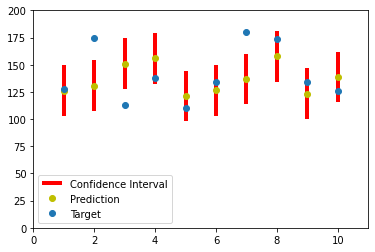

In [33]:
x = list(range(1, 11))

start = [pred[0] for pred in predictions]
stop = [pred[1] for pred in predictions]

plt.xlim(0, 11)
plt.ylim(0, 200)

plt.vlines(x, start, stop, 'r', lw=4, label = "Confidence Interval")
plt.plot(x, pred_b, 'o', color = 'y', label = "Prediction")
plt.plot(x, y_B, 'o', label = "Target")
plt.legend()

plt.show()

### Comment

Using the **Split Conformal Prediction for Regression** we're able to give as output a set on confidence interval: this means that we're confident that the target value will be inside this interval with a probability $P\ge 1-\alpha$, in our case ($\alpha = 0.4$) with $P\ge 0.6$; this can be also be seen from the figure above, in which the *target values* falls into the confidece intervals in 7 cases of 10, so with a probability of $P'=0.7$, which is greater than 0.6.

## Building the predictive sets for the randomly picked $m=100$ observations of the test set

In [34]:
np.random.seed(1234)

random_idx = np.random.choice(len(test_df), size = 100)

random_df = test_df.iloc[random_idx]

x_random = random_df.iloc[:, 7011:7041].values
x_random = StandardScaler().fit_transform(x_random)
x_random = pca.transform(x_random)

pred_btest = modelB.predict(x_random)
predictions_test = [[float(elem-d), float(elem+d)] for elem in pred_btest]

4/4 [==============================] - 0s 4ms/step


### Visualization of the intervals

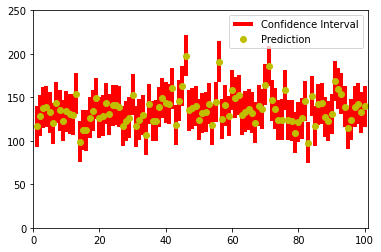

In [35]:
x = list(range(1, 101))

start = [pred[0] for pred in predictions_test]
stop = [pred[1] for pred in predictions_test]

plt.xlim(0, 101)
plt.ylim(0, 250)

plt.vlines(x, start, stop, 'r', lw=4, label = "Confidence Interval")
plt.plot(x, pred_btest, 'o', color = 'y', label = "Prediction")
plt.legend()

plt.show()

### Comment

The **Split Conformal Prediction for Regression** gives us more confidece in using our model to predict on the test set: we have the security of having at least $1-\alpha$ % of the target values (in  our case the $0.6$%) falling into our confidence intervals.

We've have to remember that for gaining this confidence in the output, we're sacrificing half of our training set (loosing training values). To fully understand this last statement we can use as an example our models:
using all the train set in training as for the first model makes our model gain more knowledge of the data distribution, while using part of that set to build confidence intervals, makes the output more resilient to variance; **we're sacrificing knowledge for confidence**.